In [1]:
#Importing the libraries
import pandas as pd
import numpy as np
import plotly 
import plotly.express as px 
from matplotlib import pyplot as plt 
import requests as r
import geopy
from geopy.geocoders import Nominatim

In [64]:
#Load dataset and determining the DataFrame as "df"
df = pd.read_excel (r'C:\Users\ramon\OneDrive\Área de Trabalho\Dados-Geolocalizacao.xlsx', sheet_name='Sheet1')

In [65]:
#Look DataFrame
df.head()

,Bateria violada?,Chassi,Carro ligado?,Data de ocorrencia,Data de recebimento,Latitude,Longitude,Modo,Tensão
0,0.0,#0&CN$#P@0RT253#9,0.0,2020-08-27 05:38:28,2020-08-27 05:38:33,-29983650.0,-50973330.0,RF,14.0
1,0.0,#0&CN$#P@0RT253#9,1.0,2020-08-27 05:39:08,2020-08-27 05:39:10,-29983640.0,-51132420.0,RF,13.0
2,0.0,#0&CN$#P@0RT253#9,1.0,2020-08-27 09:52:32,2020-08-27 09:52:34,-29997250.0,-51135620.0,RF,12.0
3,0.0,#0&CN$#P@0RT253#9,1.0,2020-08-27 09:52:47,2020-08-27 09:53:43,-29998200.0,-51136080.0,RF,12.0
4,0.0,#0&CN$#P@0RT253#9,1.0,2020-08-27 09:53:34,2020-08-27 09:55:10,-29997910.0,-51139060.0,RF,12.0


In [68]:
#Null Values Analysis
df.isnull().sum()

Bateria violada?        1
Chassi                  1
Carro ligado?           1
Data de ocorrencia      1
Data de recebimento     1
Latitude                1
Longitude               1
Modo                    1
Tensão                 48
dtype: int64

In [69]:
#Looking for a line without records
df_index = df[df['Bateria violada?'].isnull()].index
df_index

Int64Index([19519], dtype='int64')

In [70]:
#Excluding a line without records
df.drop(19519, axis=0, inplace=True)

In [71]:
#Null Values Analysis
df.isnull().sum()

Bateria violada?        0
Chassi                  0
Carro ligado?           0
Data de ocorrencia      0
Data de recebimento     0
Latitude                0
Longitude               0
Modo                    0
Tensão                 47
dtype: int64

In [72]:
#Look "Tensão" column mean
df['Tensão'].mean()

18.944401376786878

In [74]:
#Fill the "Tensão" null value with the "Tensão" column mean
df = df.fillna(df['Tensão'].mean())

In [75]:
#Null Values Analysis
df.isnull().sum()

Bateria violada?       0
Chassi                 0
Carro ligado?          0
Data de ocorrencia     0
Data de recebimento    0
Latitude               0
Longitude              0
Modo                   0
Tensão                 0
dtype: int64

In [66]:
#LAT and LONG Treatment Columns
df['Latitude'] = df['Latitude']/1000000
df['Longitude'] = df['Longitude']/1000000

In [67]:
df.head()

,Bateria violada?,Chassi,Carro ligado?,Data de ocorrencia,Data de recebimento,Latitude,Longitude,Modo,Tensão
0,0.0,#0&CN$#P@0RT253#9,0.0,2020-08-27 05:38:28,2020-08-27 05:38:33,-29.98365,-50.97333,RF,14.0
1,0.0,#0&CN$#P@0RT253#9,1.0,2020-08-27 05:39:08,2020-08-27 05:39:10,-29.98364,-51.13242,RF,13.0
2,0.0,#0&CN$#P@0RT253#9,1.0,2020-08-27 09:52:32,2020-08-27 09:52:34,-29.99725,-51.13562,RF,12.0
3,0.0,#0&CN$#P@0RT253#9,1.0,2020-08-27 09:52:47,2020-08-27 09:53:43,-29.99820,-51.13608,RF,12.0
4,0.0,#0&CN$#P@0RT253#9,1.0,2020-08-27 09:53:34,2020-08-27 09:55:10,-29.99791,-51.13906,RF,12.0


In [76]:
#Look column data types
df.dtypes

Bateria violada?              float64
Chassi                         object
Carro ligado?                 float64
Data de ocorrencia     datetime64[ns]
Data de recebimento    datetime64[ns]
Latitude                      float64
Longitude                     float64
Modo                           object
Tensão                        float64
dtype: object

In [77]:
#Data Types Treatment Columns
df['Tensão']           = df['Tensão'].astype('int64')
df['Bateria violada?'] = df['Bateria violada?'].astype('int64')
df['Carro ligado?']   = df['Carro ligado?'].astype('int64')

In [78]:
#Look column output from Data Types Treatment Columns
df.dtypes

Bateria violada?                int64
Chassi                         object
Carro ligado?                   int64
Data de ocorrencia     datetime64[ns]
Data de recebimento    datetime64[ns]
Latitude                      float64
Longitude                     float64
Modo                           object
Tensão                          int64
dtype: object

In [80]:
#Descriptive Statistics
df.describe()

,Bateria violada?,Carro ligado?,Latitude,Longitude,Tensão
count,32296.000000,32296.000000,32296.000000,32296.000000,32296.000000
mean,0.000712,0.750619,-22.786846,-46.626707,18.943027
std,0.026677,0.432661,4.519762,3.137850,23.028041
min,0.000000,0.000000,-41.025640,-56.089610,0.000000
25%,0.000000,1.000000,-23.668630,-48.007224,12.000000
50%,0.000000,1.000000,-23.548502,-46.577610,13.000000
75%,0.000000,1.000000,-22.849027,-46.414920,14.000000
max,1.000000,1.000000,-3.785750,-34.822450,100.000000


<AxesSubplot:>

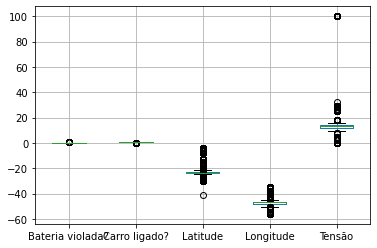

In [81]:
#Descriptive Statistics | Boxplot
df.boxplot()

In [82]:
#Look Unique Values
df.nunique()

Bateria violada?           2
Chassi                   302
Carro ligado?              2
Data de ocorrencia     24917
Data de recebimento    25433
Latitude               13868
Longitude              14220
Modo                       2
Tensão                    23
dtype: int64

In [83]:
#Look Size Data Frame
df.shape

(32296, 9)

In [85]:
#Descriptive Statistics of Tensão field
df.groupby(['Tensão']).size()

Tensão
0       1314
2         11
3          2
4         40
5          4
7          1
8          3
9          1
10         7
11       113
12      9328
13     10056
14      8592
15       160
16         1
18        49
25        43
26        17
27         5
28       157
29        17
32         1
100     2374
dtype: int64

In [86]:
#Descriptive Statistics of Chassi field
df.groupby(['Chassi']).size().sort_values(ascending=False)

Chassi
#0D$CRYUWD&@2323T    1403
#0&SUT19@YRT8#2T2    1252
#0&CN$#X@SR9$@$95     926
#0D$CRYUYE&@$T$#2     921
#0P239TT@E8@3T5#@     682
                     ... 
#0&SN81S@HRT@21T8       1
#0D$DRYUU&&@T@355       1
#0D2CN8ST0&@9@892       1
#0&SN81S@URTT@19T       1
#0&CS$#X@CRT253T1       1
Length: 302, dtype: int64

In [97]:
#Create a new columns
df['city'] = 'NA'
df['country'] = 'NA'
df['postcode'] = 'NA'
df['state'] = 'NA'

In [106]:
#Look the columns and output from new created columns
df.columns

Index(['Bateria violada?', 'Chassi', 'Carro ligado?', 'Data de ocorrencia',
       'Data de recebimento', 'Latitude', 'Longitude', 'Modo', 'Tensão',
       'city', 'country', 'postcode', 'state'],
      dtype='object')

In [ ]:
#Populate the new fields with geolocation data via API 
geolocator = Nominatim( user_agent='geoApiCase' )

for i in range ( len (df)):
  #make query
    query = str( df.loc[i,'Latitude'] ) + ',' + str( df.loc[i,'Longitude'] )
  #API request
    response = geolocator.reverse(query)
 #Populate Data
    if 'city' in response.raw['address']: 
      df.loc[i,'city']          = response.raw['address']['city']
    elif 'country' in response.raw['address']:
      df.loc[i,'country']  = response.raw['address']['country']
    elif 'postcode' in response.raw['address']:
      df.loc[i,'postcode'] = response.raw['address']['postcode']
    elif 'state' in response.raw['address']:
      df.loc[i,'state']         = response.raw['address']['state']
    else: "nao encontrado"

In [16]:
#Look API output
df.head()

,Bateria violada?,Chassi,Carro ligado?,Data de ocorrencia,Data de recebimento,Latitude,Longitude,Modo,Tensão,city,country,postcode,state
0,0,#0&CN$#P@0RT253#9,0,2020-08-27 05:38:28,2020-08-27 05:38:33,-29.98365,-50.97333,RF,14,Alvorada,Brasil,94834-670,Rio Grande do Sul
1,0,#0&CN$#P@0RT253#9,1,2020-08-27 05:39:08,2020-08-27 05:39:10,-29.98364,-51.13242,RF,13,Porto Alegre,Brasil,91120-280,Rio Grande do Sul
2,0,#0&CN$#P@0RT253#9,1,2020-08-27 09:52:32,2020-08-27 09:52:34,-29.99725,-51.13562,RF,12,Porto Alegre,Brasil,91110-440,Rio Grande do Sul
3,0,#0&CN$#P@0RT253#9,1,2020-08-27 09:52:47,2020-08-27 09:53:43,-29.99820,-51.13608,RF,12,Porto Alegre,Brasil,91110-440,Rio Grande do Sul
4,0,#0&CN$#P@0RT253#9,1,2020-08-27 09:53:34,2020-08-27 09:55:10,-29.99791,-51.13906,RF,12,Porto Alegre,Brasil,91110-580,Rio Grande do Sul


In [ ]:
df.to_excel(r'C:\Users\ramon\OneDrive\Área de Trabalho\Dados-Geolocalizacao3.xlsx', sheet_name='Sheet1', index = False)